In [1]:
import h5py
import numpy as np
import astropy
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import scipy

from scipy.ndimage import gaussian_filter 

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
# does the actual work of the USM

def process_usm(cc_sum, FWHM = 30.):
    
    pix_len = file[0].header['CDELT2'] * 60 # ['CDELT2'] = pixel length in deg, multiply by 60 to convert to arcmin
    FWHM30_pix = FWHM / pix_len # want FWHM to be 30 arcmin, so convert to pixels
    sigma = FWHM30_pix / (2 * np.sqrt(2 * np.log(2))) # converts from FWHM to sigma, since Gaussian filter specified by sigma
    sum_smooth = gaussian_filter(cc_sum, sigma = sigma) # does smoothing using Gaussian filter
    
    sum_USM = cc_sum - sum_smooth
    sum_USM[np.where(sum_USM < 0.)] = 0.
    
    return sum_USM


In [4]:
file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/LMC_RHT_cube.fits')

In [5]:
outroot = '/Users/FRANNYPACK/Downloads/grind!/research/Data/LMC_RHT/'

In [7]:
# gives array for USM of RHT channel map and normalized RHT map itself

def comp_RHT(num):
    norm = h5py.File(outroot + 'LMC_RHT_norm{}.h5'.format(num), 'r+') # get file 
    norm = np.array(norm.get('RHT'))
    norm = np.sum(norm, axis = 2)
    
    usm = process_usm(file[0].data[num,:,:])
    
    return norm, usm

In [8]:
norm0, usm0 = comp_RHT(0)

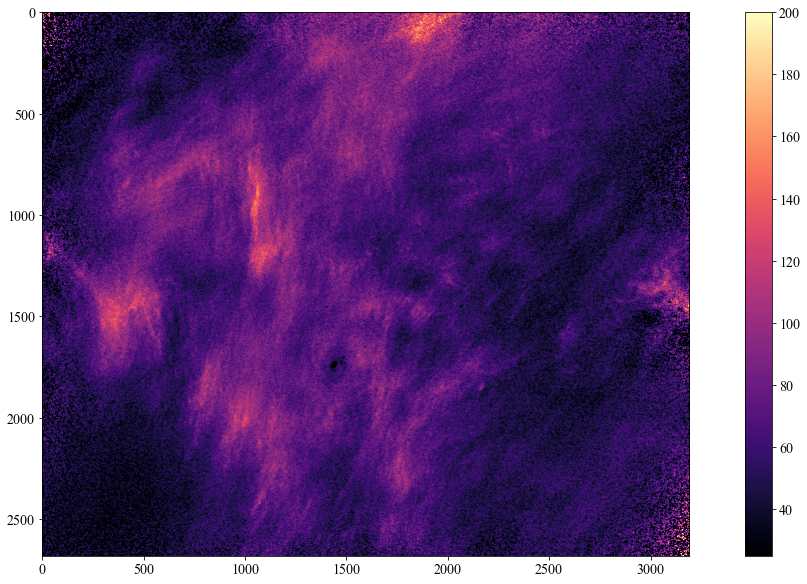

In [15]:
plt.imshow(file[0].data[0,:,:], cmap = 'magma', vmin = 25, vmax = 200)
plt.colorbar()

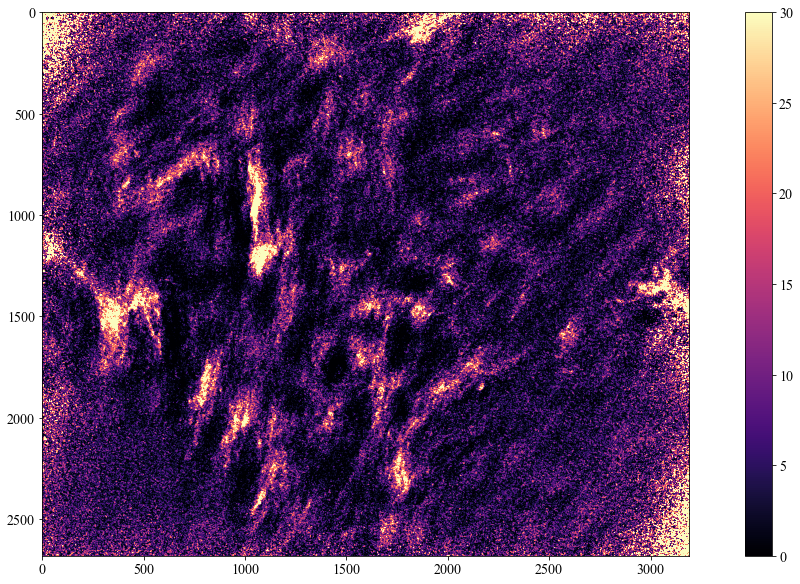

In [18]:
plt.imshow(usm0, cmap = 'magma', vmax = 30)
plt.colorbar()

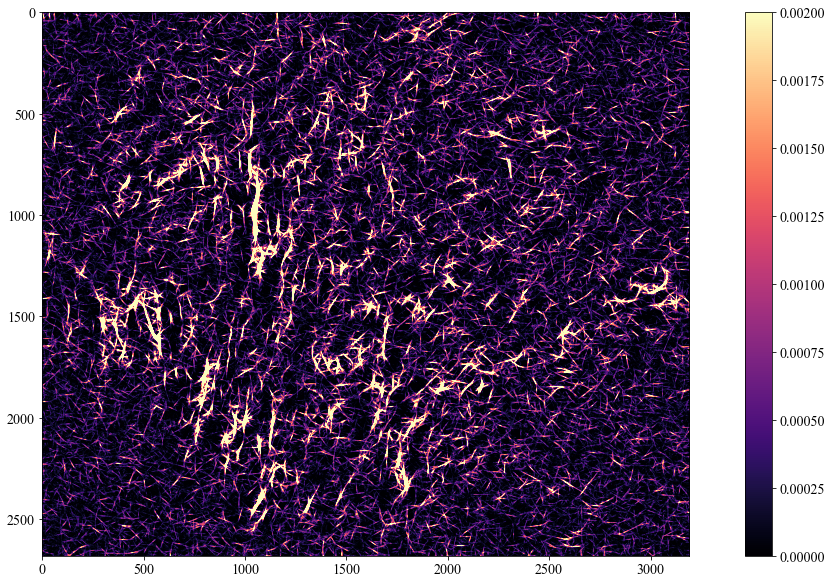

In [20]:
plt.imshow(norm0, cmap = 'magma', vmax = 0.002)
plt.colorbar()

In [21]:
norm5, usm5 = comp_RHT(2)

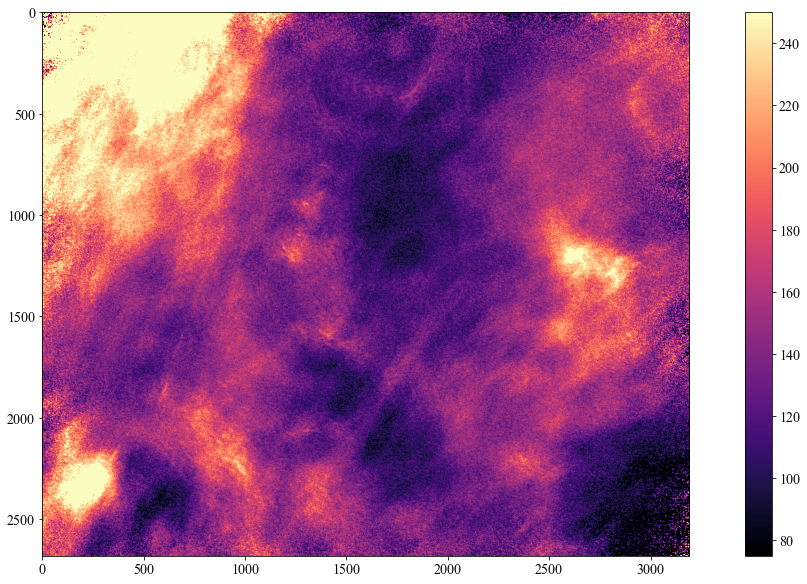

In [28]:
plt.imshow(file[0].data[5,:,:], cmap = 'magma', vmin = 75, vmax = 250)
plt.colorbar()

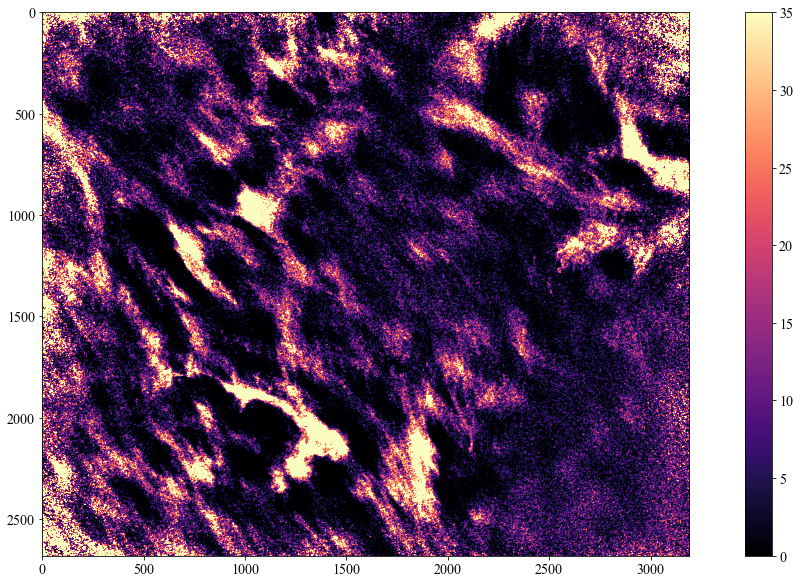

In [50]:
plt.imshow(np.flip(usm5, axis = 1), cmap = 'magma', vmax = 35)
plt.colorbar()

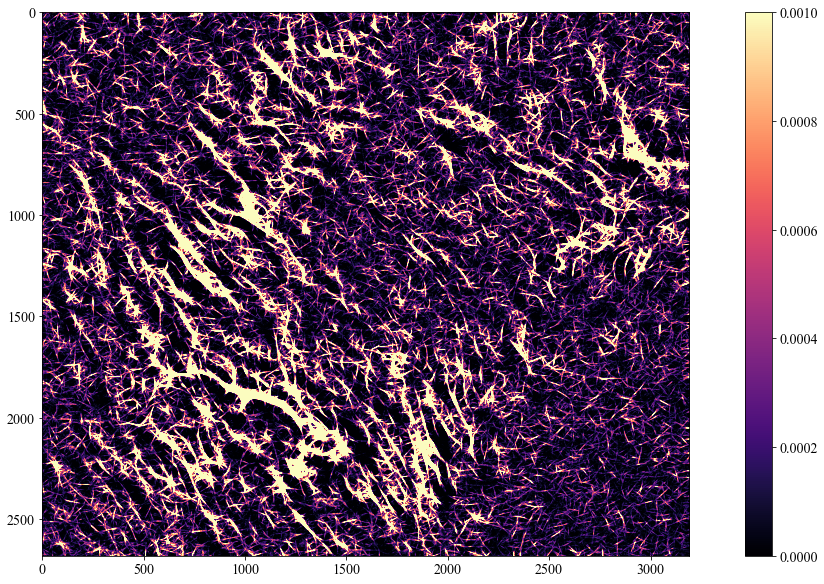

In [51]:
plt.imshow(np.flip(norm5, axis = 1), cmap = 'magma', vmax = 0.001)
plt.colorbar()